In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
dp=pd.read_csv('C:\\Users\\hp\\Desktop\\FODS_2\\FODS-A2.csv')

In [3]:
dp=(dp-dp.mean())/dp.std()

In [4]:
train_dp=dp.sample(frac=0.8,random_state=90)
test_dp=dp.drop(train_dp.index)

In [5]:
x_train=train_dp.iloc[:,0:26]
x_test=test_dp.iloc[:,0:26]
y_train=train_dp.iloc[:,-1]
y_test=test_dp.iloc[:,-1]

In [6]:
def calc_weights(x,y):
    weights=np.ones((x.shape[1],1))
    product=np.dot(x.T,x)
    inverse_matrix = np.linalg.inv(product)
    prod = np.dot(inverse_matrix,x.T)
    weights=np.dot(prod,y)
    return weights

In [7]:
def model_error(x,subset,y):   
    x=x.iloc[:,subset]
    weights=calc_weights(x,y)
    n=len(x)
    error=(1/(2*n))*np.sum(np.square(y-np.dot(x,weights)))
    return error

In [8]:
subset=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
final_error=model_error(test_dp,subset,y_test)
backward_training=[]
error_list=[]
error_list.append(subset)
error_list.append(final_error)

In [9]:
for j in range(26):
    toberemoved=-1
    for i in range(26):
        temp_copy=subset.copy()
        if(i in temp_copy):
            temp_copy.remove(i)
            temp_error=model_error(test_dp,temp_copy,y_test)
            temp_list=[]
            temp_list.append(temp_copy)
            temp_list.append(temp_error)
            error_list.append(temp_list)
            if(temp_error>=final_error):
                final_error=temp_error
                toberemoved=i
    if(toberemoved!=-1):
        subset.remove(toberemoved)
        backward_training.append(final_error)
    else:
        break

In [10]:
error_list.pop(0)
error_list.pop(0)
error_list.pop()

[[], 0.5040081529843484]

In [11]:
error_list

[[[1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21,
   22,
   23,
   24],
  0.4178892071977912],
 [[0,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21,
   22,
   23,
   24],
  0.43849401111529185],
 [[0,
   1,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21,
   22,
   23,
   24],
  0.4205394364178587],
 [[0,
   1,
   2,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21,
   22,
   23,
   24],
  0.4259525209416247],
 [[0,
   1,
   2,
   3,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21,
   22,
   23,
   24],
  0.4373452872627673],
 [[0,
   1,
   2,
   3,
   4,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
  

In [12]:
graph_list=[]
model_list=[]
for i in range(324):
    graph_list.append(error_list[i][1])
    model_list.append(i)


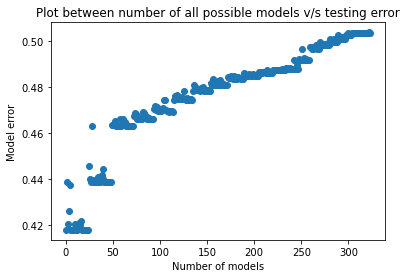

In [13]:
plt.scatter(model_list,graph_list)
plt.xlabel("Number of models")
plt.ylabel("Model error")
plt.title("Plot between number of all possible models v/s testing error")
plt.show()